In [1]:
import tracemalloc

tracemalloc.start()

Hier worden alle libraries geïmporteerd

In [2]:
# importing required libraries

import pandas as pd
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn import tree
import warnings
warnings.simplefilter("ignore")


Hier wordt alle data van de dataset opgehaald

In [3]:
# importing the dataset

df = pd.read_csv("./newdata/collectionfile.csv")


In [4]:
# checking what types of data are in the dataframe and how much ram they take up
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5048 non-null   int64  
 1   index            5048 non-null   int64  
 2   raceId           5048 non-null   int64  
 3   driverId         5048 non-null   int64  
 4   finnishPosition  5048 non-null   int64  
 5   laps             5048 non-null   int64  
 6   year             5048 non-null   int64  
 7   round            5048 non-null   int64  
 8   circuitId        5048 non-null   int64  
 9   grand_prix       5048 non-null   int64  
 10  nationality      5048 non-null   int64  
 11  constructor      5048 non-null   int64  
 12  number           5048 non-null   int64  
 13  positionQuali    5048 non-null   int64  
 14  driver_name      5048 non-null   int64  
 15  age              5048 non-null   float64
dtypes: float64(1), int64(15)
memory usage: 631.1 KB


Alle kollomen die in het dataframe staan worden hier geprint

In [5]:
# viewing the columns in the dataframe
df.columns


Index(['Unnamed: 0', 'index', 'raceId', 'driverId', 'finnishPosition', 'laps',
       'year', 'round', 'circuitId', 'grand_prix', 'nationality',
       'constructor', 'number', 'positionQuali', 'driver_name', 'age'],
      dtype='object')

Het definieren van de waarden van de decisiontree aan een variabele (model)

In [6]:
# defining the tree structure

model = tree.DecisionTreeRegressor(max_depth=5, random_state=1234)


Het definieren van de waarden die gebruikt worden om te voorspellen en de te voorspellen waarde

In [7]:
# creating two seperate dataframes for the training and testing data

X = pd.DataFrame(df.drop(['finnishPosition'], axis=1))

y = pd.DataFrame(df, columns=['finnishPosition'])


De data splitten in trainingdata en testdata met de gegeven parameters

In [8]:
# performing a train test split to separate the data into training and testing data

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.33, random_state=42)


Past de classificationTree aan, aan de invoertrainingsgegevens

In [9]:
model.fit(Xtrain, ytrain)

DecisionTreeRegressor(max_depth=5, random_state=1234)

Scoort het model van de kolom boven op overeenkomst

In [10]:
model.score(Xtrain, ytrain)


0.4481581617233563

Past de classificationTree aan, aan de invoertrainingsgegevens

In [11]:
model.fit(Xtest, ytest)

DecisionTreeRegressor(max_depth=5, random_state=1234)

Scoort het model van de kolom boven op overeenkomst

In [12]:
model.score(Xtest, ytest)



0.4302213297680225

Voorspelling maken van y op basis van Xtest

In [13]:
# predicting the y values by using this model on the earlier defined Xtest data

y_pred_tree = model.predict(Xtest)


Het vergelijken van de ytest- en de voorspelde y waarden

In [14]:
# calculating the r2 score (done earlier by model.score)

r2_score(ytest, y_pred_tree)

0.4302213297680225

Een grafiek maken die de werkelijke data plot tegen de voorspelde data

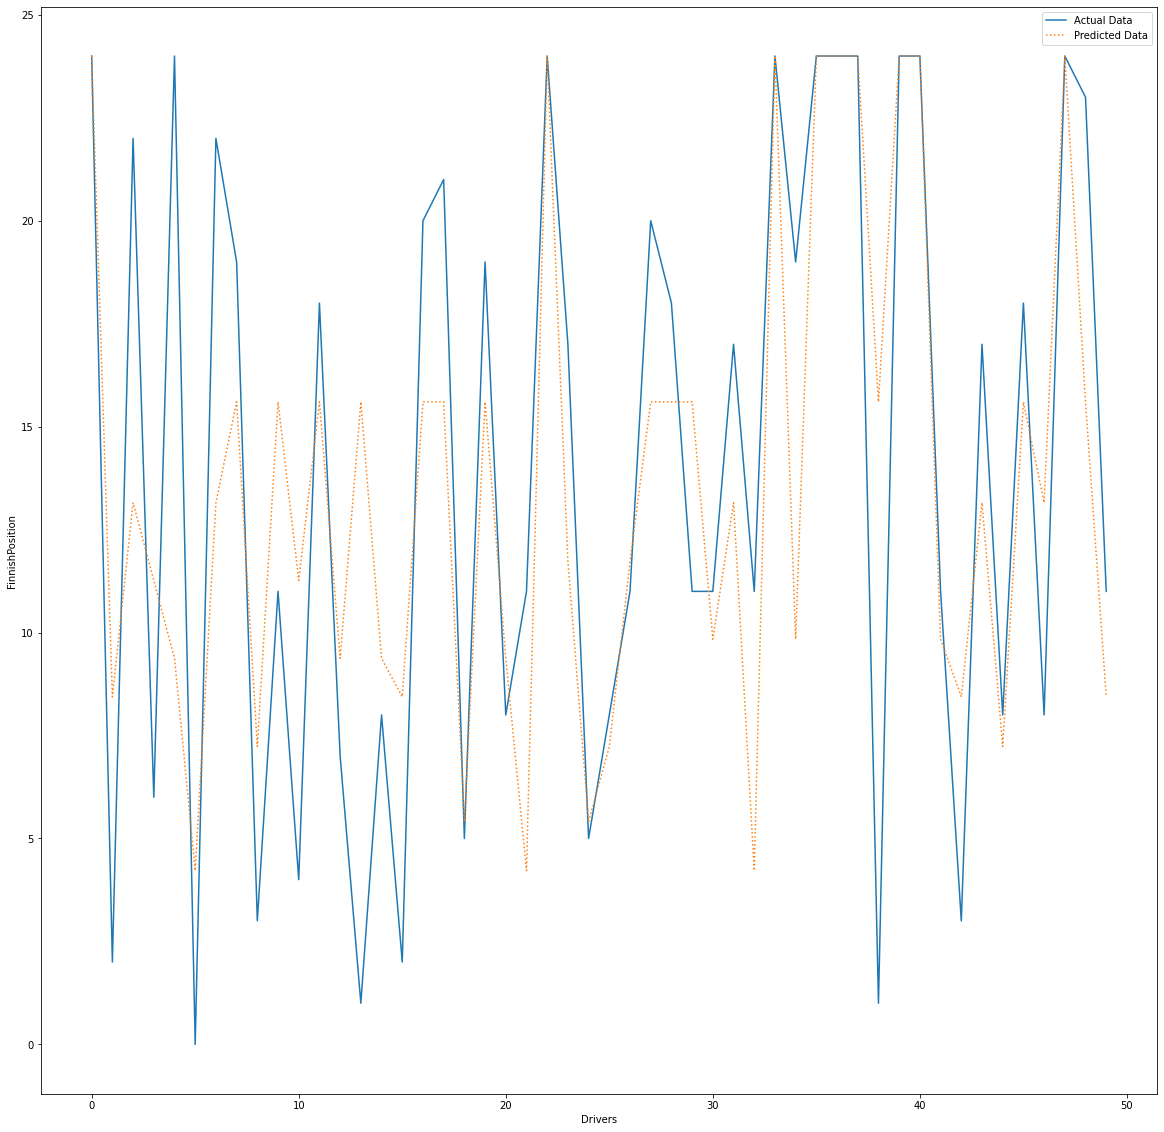

In [15]:
# visualising the first 50 rows of the data vs the predicted values

figGraph = plt.figure(figsize=(20, 20))

plt.plot([item for item in range(len(ytest[0:50]))], ytest.values[0:50], label="Actual Data")
plt.plot([item for item in range(len(ytest[0:50]))], y_pred_tree[0:50], label="Predicted Data", linestyle=':')
plt.ylabel("FinnishPosition")
plt.xlabel("Drivers")
plt.legend(loc='best')
plt.show()


Het opslaan van de grafiek

In [16]:
# saving the graph as a png file

figGraph.savefig("./Figures/predictionVSreality_graph.png")


De variable feature_names definieren als X om het te plotten in een decisiontree

In [17]:
# defining the variables for the tree

fn = list(X)


Het plotten van de tree

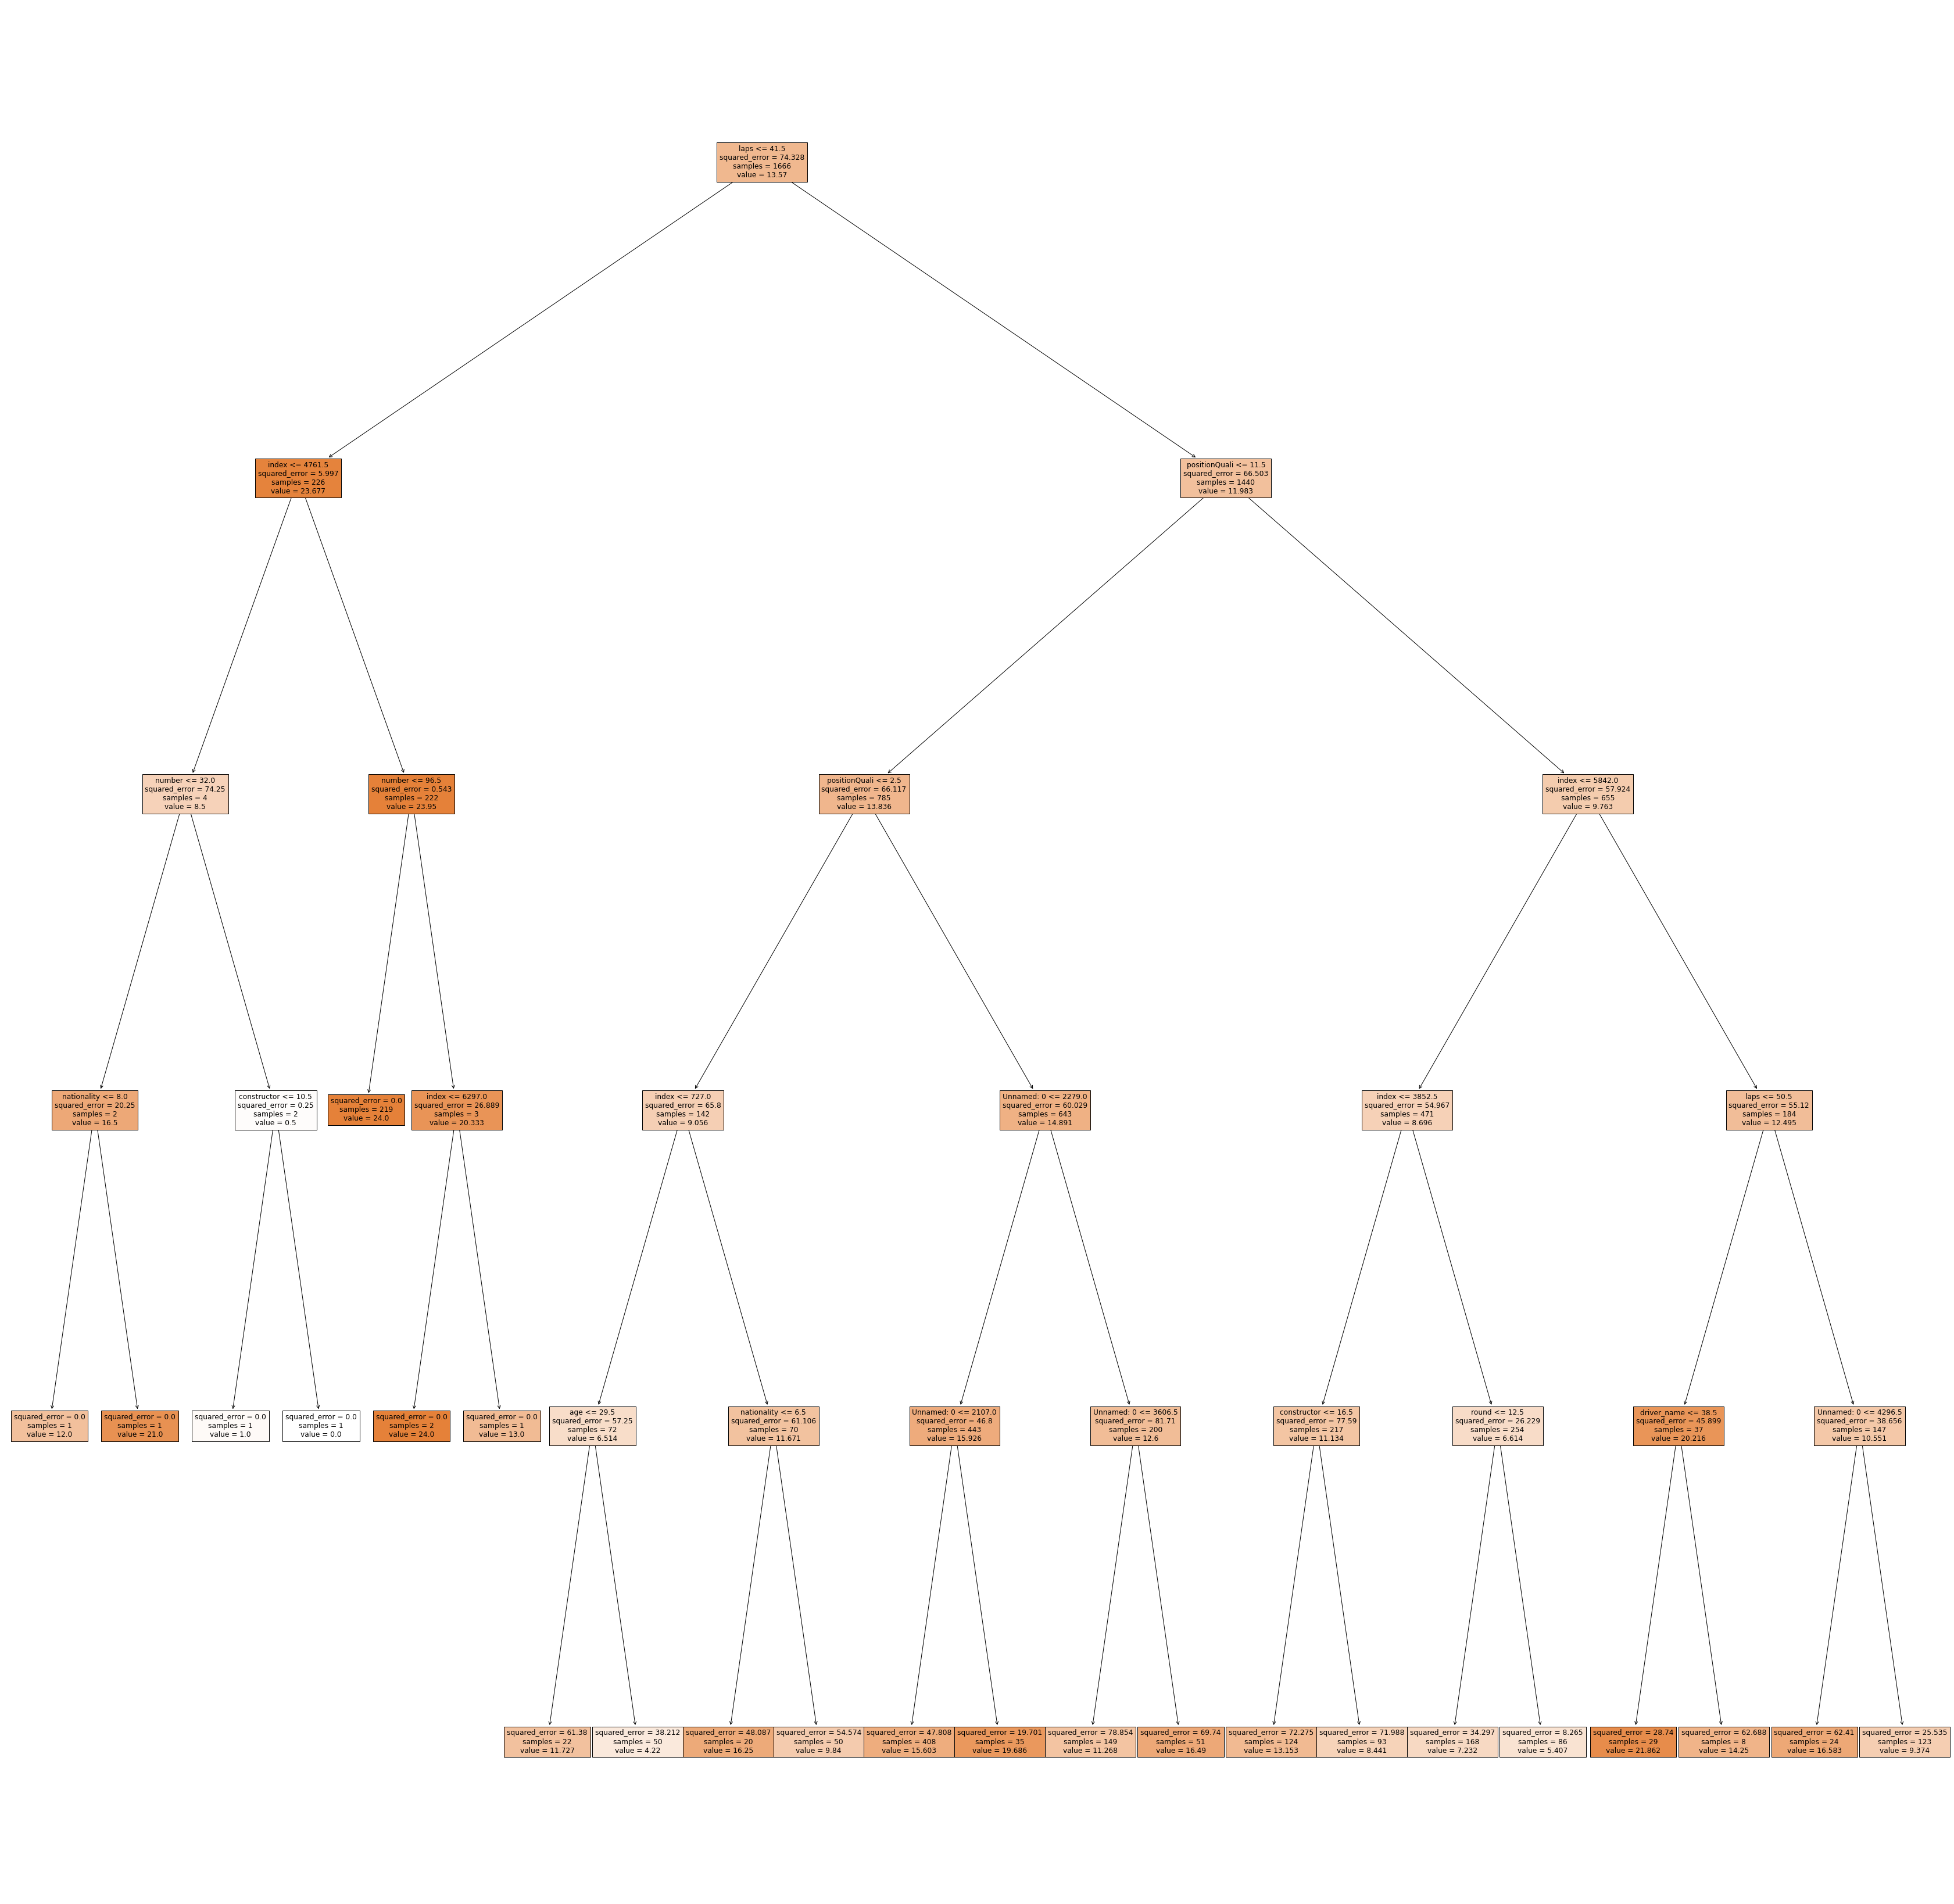

In [18]:
# creating the tree

treeFig = plt.figure(figsize=(60, 60))
_ = tree.plot_tree(model,
                   feature_names=fn,
                   filled=True)


Het opslaan van de geplotte tree

In [19]:
# saving the plotted tree as a png file

treeFig.savefig("./Figures/decision_tree.png")


Het uitrekenen van de tijdscomplexiteit van de code

In [20]:
# calculating the timecomplexity of the algorithm

import timeit

timeit.timeit(lambda: "-".join(map(str, range(1000))), number=10000)


14.589131400000042

Het berekenen van de spacecomplexiteit

In [21]:
# calculating the spacecomplexity of the algorithm

snapshot = tracemalloc.take_snapshot()
top_stats = snapshot.statistics('traceback')


stat = top_stats[0]
print("%s memory blocks: %.1f KiB" % (stat.count, stat.size / 1024))
for line in stat.traceback. format():
    print(line)


239823 memory blocks: 29881.8 KiB
  File "<frozen importlib._bootstrap_external>", line 672
